In [450]:
import pandas as pd

df = pd.read_csv('./churn.csv',encoding='cp949')
print(df)

      Unnamed: 0                                userid  proc_ymd  Target  \
0              0  08673229-8159-464d-9af1-4f706e4329a9  20231227      10   
1              1  69a8880d-3eb5-4dd4-94eb-686120e5cdf9  20231212      10   
2              2  700323ce-b0e9-4665-9156-ea1cff73bdcb  20231204      10   
3              3  83fe36f9-3052-4f76-9451-f638afea1bd7  20231209      10   
4              4  f35c3a6d-6cb0-4ac7-8898-1234cc88dafe  20231204      10   
...          ...                                   ...       ...     ...   
2996        2996  83ce1034-4933-4a76-bc2f-612d1b12c7bf  20231218      10   
2997        2997  f9203c62-3bda-4512-b668-40bec57e8efd  20231215      10   
2998        2998  9029498f-d670-4acc-8376-74328f5e4880  20231219      30   
2999        2999  bb97b8f5-2b4e-4386-89ff-33eec2b41712  20231207      10   
3000        3000  d19a0ba7-7c6f-4b0a-9499-a28b982524b1  20231220      10   

     sect_cd gender_cd grade_cd grade mcode completed_yn  ... media_action  \
0        

<Axes: xlabel='completed_yn', ylabel='count'>

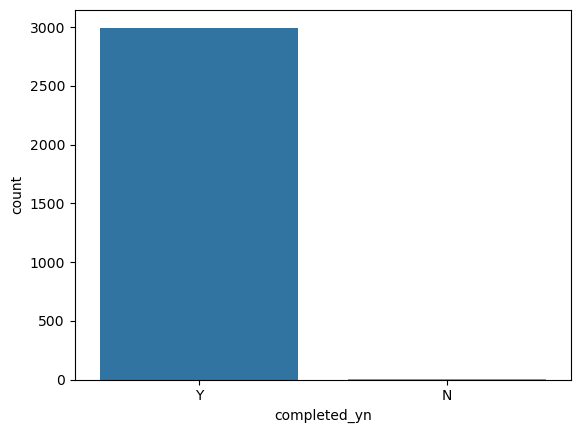

In [451]:
import seaborn as sns

sns.countplot(df,x='completed_yn') 

In [452]:
def change_target(data):
    if data == 10:
        data = 0
    else:
        data = 1
    return data
df['Target'] = df['Target'].apply(lambda x : change_target(x))
print(df.isna().sum())
df['system_learning_time'] = df['system_learning_time'].fillna(df['system_learning_time'].mean())
#df['restart_cnt'] = df['restart_cnt'].fillna(df['restart_cnt'].value_counts().argmax())
df['score'] = df['score'].fillna(df['score'].mean())
df['item_cnt'] = df['item_cnt'].fillna(df['item_cnt'].value_counts().argmax())
df['quizcode_cnt'] = df['quizcode_cnt'].fillna(df['quizcode_cnt'].value_counts().argmax())
df['correct_cnt'] = df['correct_cnt'].fillna(df['correct_cnt'].value_counts().argmax())
df['solved_time_avg'] = df['solved_time_avg'].fillna(df['solved_time_avg'].mean())

from sklearn.model_selection import train_test_split
df,test_df = train_test_split(df,test_size=0.3,random_state=42,shuffle=True)

Unnamed: 0                   0
userid                       0
proc_ymd                     0
Target                       0
sect_cd                      0
gender_cd                    0
grade_cd                     0
grade                        0
mcode                       16
completed_yn                 0
assessment_completed_yn      0
media_completed_yn          11
system_learning_time         2
playtime_sum                12
solved_time_sum            113
solved_time_avg            111
score                        4
item_cnt                     1
quizcode_cnt                 3
correct_cnt                  7
media_action                20
non_video_view              12
video_start                 10
video_restart                9
video_pause                  5
video_jump                  12
video_resume                 5
video_speed                  7
video_volume                 9
video_end                   14
dtype: int64


530     0
2787    0
49      0
1883    0
1011    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Target, Length: 2100, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

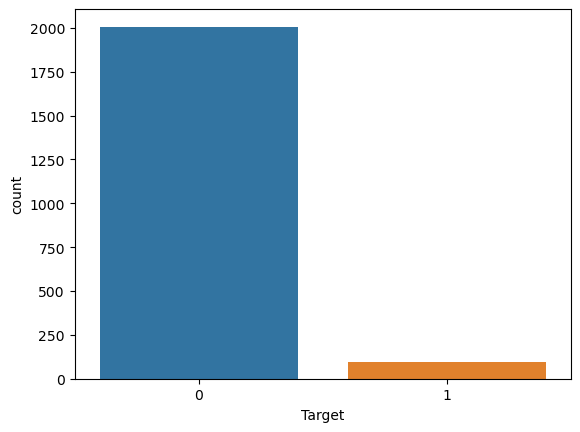

In [453]:
print(df['Target'])
import seaborn as sns

sns.countplot(df,x='Target')

In [454]:
def changeyn(data):
    if data == 'Y':
        data = 1
    else:
        data = 0
    return data
yn_list = ['completed_yn','assessment_completed_yn','media_completed_yn']
for i in yn_list:
    df[i] = df[i].apply(lambda x : changeyn(x))
    test_df[i] = test_df[i].apply(lambda x : changeyn(x))

In [455]:
drop_list = ['sect_cd','grade_cd','playtime_sum','solved_time_sum','proc_ymd']
non_video_data = df.drop(drop_list,axis=1)
test_df = test_df.drop(drop_list,axis=1)

In [456]:

non_video_data = non_video_data.drop('Unnamed: 0',axis=1)
test_df = test_df.drop('Unnamed: 0',axis=1)
print(non_video_data.columns)
print(non_video_data.head())


Index(['userid', 'Target', 'gender_cd', 'grade', 'mcode', 'completed_yn',
       'assessment_completed_yn', 'media_completed_yn', 'system_learning_time',
       'solved_time_avg', 'score', 'item_cnt', 'quizcode_cnt', 'correct_cnt',
       'media_action', 'non_video_view', 'video_start', 'video_restart',
       'video_pause', 'video_jump', 'video_resume', 'video_speed',
       'video_volume', 'video_end'],
      dtype='object')
                                    userid  Target gender_cd grade mcode  \
530   0308a100-7115-4e9b-b183-9c4317190792       0         남  초6학년    수학   
2787  9d89e4e1-2f30-4d54-9ff8-485eedb30c3b       0         여  초1학년    체육   
49    94eaa289-c63a-48ab-a73c-62e52853daee       0         여  초3학년    사회   
1883  a3b07778-7de7-4d1b-a020-20882e7b4501       0         여  초2학년    미술   
1011  25b43b71-42c9-454c-b2c1-d1fd89e01d67       0         남  초4학년    영어   

      completed_yn  assessment_completed_yn  media_completed_yn  \
530              1                        1  

In [457]:
import matplotlib.pyplot as plt
col_list = non_video_data.columns
#for i in col_list:
#    sns.countplot(non_video_data,x=i) 
#    plt.show()

In [458]:
drop_list = ['completed_yn', 'assessment_completed_yn', 'media_completed_yn',  'video_restart', 'video_pause', 'video_jump', 'video_resume', 'video_speed', 'video_volume']
non_video_data = non_video_data.drop(drop_list,axis=1)

In [459]:
test_df = test_df.drop(drop_list,axis=1)

In [460]:
def gender(data):
    if data == '정보없음':
        data = '여'
    return data
non_video_data['gender_cd'] = non_video_data['gender_cd'].apply(lambda x : gender(x))
test_df['gender_cd'] = test_df['gender_cd'].apply(lambda x : gender(x))

In [461]:
one_hot = pd.get_dummies(non_video_data['gender_cd'],dtype=int)
tone_hot =pd.get_dummies(test_df['gender_cd'],dtype=int)
print(one_hot)

preprocess_df = pd.concat([non_video_data,one_hot],axis=1)
test_df = pd.concat([test_df,tone_hot],axis=1)


      남  여
530   1  0
2787  0  1
49    0  1
1883  0  1
1011  1  0
...  .. ..
1638  1  0
1095  1  0
1130  0  1
1294  0  1
860   1  0

[2100 rows x 2 columns]


In [462]:
print(preprocess_df.isna().sum())
print(preprocess_df['video_end'].describe())
#mcode -> most common
#media action -> 독립적이므로 중간값 10
#non_video_view -> 독립적이므로 중간값 5
#video_start -> 독립적이므로 중간값 2
#video_end -> '' 2
change_list = ['mcode','media_action','non_video_view','video_start','video_end']
#mcode만 최빈값 처리 후 원핫인코딩

for i in range(len(change_list)):
    if change_list[i] == 'mcode':
        preprocess_df['mcode'] = preprocess_df['mcode'].fillna(preprocess_df['mcode'].value_counts().argmax())
        test_df['mcode'] = test_df['mcode'].fillna(test_df['mcode'].value_counts().argmax())
    else:
        preprocess_df[change_list[i]] = preprocess_df[change_list[i]].fillna(preprocess_df[change_list[i]].median())
        test_df[change_list[i]] = test_df[change_list[i]].fillna(test_df[change_list[i]].median())



userid                   0
Target                   0
gender_cd                0
grade                    0
mcode                   12
system_learning_time     0
solved_time_avg          0
score                    0
item_cnt                 0
quizcode_cnt             0
correct_cnt              0
media_action            15
non_video_view           9
video_start              6
video_end               11
남                        0
여                        0
dtype: int64
count    2089.000000
mean        1.667784
std         1.393650
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        14.000000
Name: video_end, dtype: float64


In [463]:
# mcode one hot 후에 gender_cd 랑 mcode 드랍
print(preprocess_df['mcode'].unique())
preprocess_df['mcode'] = preprocess_df['mcode'].apply(lambda x : '일본어' if x == 0 else x)
test_df['mcode'] = test_df['mcode'].apply(lambda x : '일본어' if x == 0 else x)

one_hot = pd.get_dummies(preprocess_df['mcode'],dtype=int)
tone_hot =pd.get_dummies(test_df['mcode'],dtype=int)

preprocess_df = pd.concat([preprocess_df,one_hot],axis=1)
test_df = pd.concat([test_df,tone_hot],axis=1)

['수학' '체육' '사회' '미술' '영어' '국사' '국어' '중국어' '기술가정' '일본어' 0 '과학' '도덕']


In [464]:
preprocess_df = preprocess_df.drop(['mcode','gender_cd'],axis=1)
test_df = test_df.drop(['mcode','gender_cd'],axis=1)

In [465]:
print(preprocess_df.columns)

Index(['userid', 'Target', 'grade', 'system_learning_time', 'solved_time_avg',
       'score', 'item_cnt', 'quizcode_cnt', 'correct_cnt', 'media_action',
       'non_video_view', 'video_start', 'video_end', '남', '여', '과학', '국사',
       '국어', '기술가정', '도덕', '미술', '사회', '수학', '영어', '일본어', '중국어', '체육'],
      dtype='object')


In [466]:
user = preprocess_df['userid']
preprocess_df = preprocess_df.drop('userid',axis=1)

t_user = test_df['userid']
test_df = test_df.drop('userid',axis=1)

preprocess_df['grade'] = preprocess_df['grade'].apply(lambda x : int(x[1]))
test_df['grade'] = test_df['grade'].apply(lambda x : int(x[1]))

In [467]:
print(preprocess_df.columns)

Index(['Target', 'grade', 'system_learning_time', 'solved_time_avg', 'score',
       'item_cnt', 'quizcode_cnt', 'correct_cnt', 'media_action',
       'non_video_view', 'video_start', 'video_end', '남', '여', '과학', '국사',
       '국어', '기술가정', '도덕', '미술', '사회', '수학', '영어', '일본어', '중국어', '체육'],
      dtype='object')


In [468]:
from sklearn.preprocessing import MinMaxScaler
train_label = preprocess_df['Target']
preprocess_df = preprocess_df.drop('Target',axis=1)
test_label = test_df['Target']
test_df = test_df.drop('Target',axis=1)
scale_list = []
for i in preprocess_df.columns:
    if i == '남':
        break
    
    scale_list.append(i)
print(scale_list)

['grade', 'system_learning_time', 'solved_time_avg', 'score', 'item_cnt', 'quizcode_cnt', 'correct_cnt', 'media_action', 'non_video_view', 'video_start', 'video_end']


In [469]:
scaler = MinMaxScaler()


preprocess_df[scale_list] = scaler.fit_transform(preprocess_df[scale_list])
test_df[scale_list] = scaler.transform(test_df[scale_list])

In [470]:
preprocess_df = preprocess_df.reset_index().drop('index',axis=1)
test_df = test_df.reset_index().drop('index',axis=1)


In [471]:
# 50 % 거르자
'''
import random 


del_list = []
for i in range(len(preprocess_df)):
    ran = random.randint(1,3)
    if train_label.iloc[i] == 0:            
        if ran == 1:
            pass
        else:
            del_list.append(i)

print(len(del_list))
'''

'\nimport random \n\n\ndel_list = []\nfor i in range(len(preprocess_df)):\n    ran = random.randint(1,3)\n    if train_label.iloc[i] == 0:            \n        if ran == 1:\n            pass\n        else:\n            del_list.append(i)\n\nprint(len(del_list))\n'

In [472]:
#preprocess_df = preprocess_df.drop(index=del_list,axis=0)

In [473]:
#train_label = train_label.reset_index().drop('index',axis=1)
#train_label = train_label.drop(index=del_list,axis=0)

In [474]:
#너무 격차가 크고 적으니 smote를 사용해보자
#from imblearn.over_sampling import SMOTE,SVMSMOTE,BorderlineSMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
#smote = SMOTE(random_state=42)
#rus = NearMiss()
#x_rus, y_rus = rus.fit_resample(preprocess_df, train_label)
#print(y_rus.value_counts())
#X_train_over,y_train_over = smote.fit_resample(preprocess_df,train_label)


In [475]:
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
tsne = TSNE(n_components=2,metric='cosine',random_state=42)
feat = tsne.fit_transform(np.array(preprocess_df))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=train_label,width=1200, height=1200) #tsne 그려줌
fig.show()

In [479]:
#너무 격차가 크고 적으니 smote를 사용해보자
from imblearn.over_sampling import SMOTE,SVMSMOTE,BorderlineSMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
smote = SMOTE(random_state=42)
#rus = NearMiss()
#x_rus, y_rus = rus.fit_resample(preprocess_df, train_label)
#print(y_rus.value_counts())
X_train_over,y_train_over = smote.fit_resample(preprocess_df,train_label)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)
feat = tsne.fit_transform(np.array(X_train_over))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=y_train_over,width=1200, height=1200) #tsne 그려줌
fig.show()

In [1671]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks,AllKNN
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
knn_class = KNeighborsClassifier(n_neighbors=3,metric='cosine',weights='distance')
random_class = RandomForestClassifier(n_estimators=20,max_depth=3,random_state=42,class_weight='balanced_subsample')
adaboost_class = AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate=0.35,algorithm='SAMME.R')
gadient_class = GradientBoostingClassifier(n_estimators=30,learning_rate=0.05,random_state=42,loss='log_loss')
xgb_class = XGBClassifier(n_estimators = 50,learning_rate = 1.2, max_depth = 1)
lgb_class = LGBMClassifier()
voting_class = VotingClassifier(estimators=[('ran',random_class),
                                            ('ada',adaboost_class),
                                            ('knn',knn_class),
                                            ('grad',gadient_class),
                                            ('xgb',xgb_class)
                                            ],voting='hard',verbose=True,weights=[3,1,3,3,4])
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(),sampling_strategy='auto',random_state=42), 
                              voting_class)

SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(preprocess_df, train_label)
print(SMOTETomek_rf.score(preprocess_df,train_label))

[Voting] ...................... (1 of 5) Processing ran, total=   0.1s
[Voting] ...................... (2 of 5) Processing ada, total=   0.2s
[Voting] ...................... (3 of 5) Processing knn, total=   0.0s
[Voting] ..................... (4 of 5) Processing grad, total=   0.2s
[Voting] ...................... (5 of 5) Processing xgb, total=   0.0s
0.95


In [1672]:
y_pred = SMOTETomek_rf.predict(test_df)

In [1673]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report


accuracy_rfc = accuracy_score(test_label,y_pred)
print(accuracy_rfc)

recall = recall_score(test_label,y_pred)
print(recall)

precision = precision_score(test_label,y_pred)
print(precision)

f1 = f1_score(test_label,y_pred)
print(f1)

print(balanced_accuracy_score(test_label, y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

0.9078801331853497
0.16666666666666666
0.07936507936507936
0.10752688172043011
0.5500382701875239
              precision    recall  f1-score   support

     class 0       0.97      0.93      0.95       871
     class 1       0.08      0.17      0.11        30

    accuracy                           0.91       901
   macro avg       0.52      0.55      0.53       901
weighted avg       0.94      0.91      0.92       901



In [1674]:
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier,BalancedBaggingClassifier

print(test_label.value_counts())
brf1 = BalancedRandomForestClassifier(
    n_estimators=100, random_state=42, sampling_strategy="auto", replacement=False,
    bootstrap=True
)
brf2 = RUSBoostClassifier(n_estimators=100, algorithm='SAMME.R',
                              random_state=42,learning_rate=1.2,sampling_strategy='auto')
voting_class = VotingClassifier(estimators=[('ran',brf1),
                                            ('ada',brf2)

                                            ],voting='soft',verbose=True)
voting_class.fit(preprocess_df, train_label)
y_pred = voting_class.predict(test_df)
print(balanced_accuracy_score(test_label, y_pred))



Target
0    871
1     30
Name: count, dtype: int64
[Voting] ...................... (1 of 2) Processing ran, total=   0.2s


C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\parallel.py:114: UserWarning:

`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\parallel.py:114: UserWarning:

`sklearn.utils.parallel

[Voting] ...................... (2 of 2) Processing ada, total=   0.2s
0.4175468809797168


In [1675]:

target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.47      0.63       871
     class 1       0.02      0.37      0.04        30

    accuracy                           0.47       901
   macro avg       0.49      0.42      0.34       901
weighted avg       0.92      0.47      0.61       901



In [1676]:
clf = RandomForestClassifier(random_state=42,max_depth=5,class_weight='balanced_subsample')

clf.fit(preprocess_df,train_label)
origin_pred = clf.predict(test_df)
target_names = ['class 0', 'class 1']

print(classification_report(test_label, origin_pred, target_names=target_names))
f1 = f1_score(test_label,origin_pred)
print(f1)

              precision    recall  f1-score   support

     class 0       0.96      0.86      0.91       871
     class 1       0.02      0.07      0.03        30

    accuracy                           0.84       901
   macro avg       0.49      0.46      0.47       901
weighted avg       0.93      0.84      0.88       901

0.02631578947368421


In [1677]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2326]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim,output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = F.pairwise_distance(anchor, positive)
        distance_negative = F.pairwise_distance(anchor, negative)
        loss = torch.mean(torch.relu(distance_positive - distance_negative + self.margin))
        return loss
    
class TripletDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.classes = torch.unique(labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        anchor = self.data[idx]
        anchor_label = self.labels[idx]

        positive_candidates = self.data[self.labels == anchor_label]
        positive = positive_candidates[np.random.randint(len(positive_candidates))]

        negative_label = torch.tensor(np.random.choice(self.classes[self.classes != anchor_label]))
        negative_candidates = self.data[self.labels == negative_label]
        negative = negative_candidates[np.random.randint(len(negative_candidates))]

        return anchor, positive, negative

In [2346]:
triplet_dataset = TripletDataset(torch.tensor(preprocess_df.values), torch.tensor(train_label.values))

input_dim = preprocess_df.shape[1]
output_dim = 16
hidden_dim = 16
model = SimpleMLP(input_dim,hidden_dim,output_dim)
triplet_loss = TripletLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=0.0005)

In [2347]:
num_epochs = 200
print(len(triplet_dataset))
triplet_loader = torch.utils.data.DataLoader(triplet_dataset, batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in triplet_loader:
        optimizer.zero_grad()
        anchor, positive, negative = batch
        anchor, positive, negative = anchor.float(), positive.float(), negative.float()

        # 모델 예측
        anchor_output = model(anchor)
        positive_output = model(positive)
        negative_output = model(negative)

        # Triplet Loss 계산
        loss = triplet_loss(anchor_output, positive_output, negative_output)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(triplet_loader)}")

2100
Epoch 1, Loss: 0.9294983925241412
Epoch 2, Loss: 0.8904272444320448
Epoch 3, Loss: 0.7913188247969656
Epoch 4, Loss: 0.745512660705682
Epoch 5, Loss: 0.7537751739675348
Epoch 6, Loss: 0.7426900777852896
Epoch 7, Loss: 0.7779243850346768
Epoch 8, Loss: 0.7241416772206625
Epoch 9, Loss: 0.6968468996611509
Epoch 10, Loss: 0.668322890996933
Epoch 11, Loss: 0.6718186975428553
Epoch 12, Loss: 0.6481776223941282
Epoch 13, Loss: 0.6401326936302763
Epoch 14, Loss: 0.6336026972893513
Epoch 15, Loss: 0.6070424584728299
Epoch 16, Loss: 0.592646066438068
Epoch 17, Loss: 0.5908761498602954
Epoch 18, Loss: 0.5853944831725323
Epoch 19, Loss: 0.6039056692159537
Epoch 20, Loss: 0.5980391371430773
Epoch 21, Loss: 0.5679694429943056
Epoch 22, Loss: 0.5504133439425266
Epoch 23, Loss: 0.5632466461622354
Epoch 24, Loss: 0.5214131126801173
Epoch 25, Loss: 0.5502643637133368
Epoch 26, Loss: 0.5168968491030462
Epoch 27, Loss: 0.5283311339038791
Epoch 28, Loss: 0.524569669456193
Epoch 29, Loss: 0.5157040583

In [2348]:
def transform_data_with_model(model, data):
    model.eval()  
    with torch.no_grad():
        data = data.float()
        transformed_data = model(data)

    return transformed_data

transformed_data = transform_data_with_model(model, torch.tensor(preprocess_df.values,dtype=float))


In [2349]:
tsne = TSNE(n_components=2,metric='cosine',random_state=42)
feat = tsne.fit_transform(np.array(transformed_data))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=train_label,width=1200, height=1200) #tsne 그려줌
fig.show()

In [2350]:
test_transformed_data = transform_data_with_model(model, torch.tensor(test_df.values,dtype=float))


In [2351]:
clf = RandomForestClassifier(random_state=42,max_depth=5,class_weight='balanced_subsample')

clf.fit(transformed_data,train_label)
origin_pred = clf.predict(test_transformed_data)
target_names = ['class 0', 'class 1']

print(classification_report(test_label, origin_pred, target_names=target_names))
f1 = f1_score(test_label,origin_pred)
print(f1)

              precision    recall  f1-score   support

     class 0       0.97      0.90      0.93       871
     class 1       0.05      0.17      0.08        30

    accuracy                           0.88       901
   macro avg       0.51      0.53      0.51       901
weighted avg       0.94      0.88      0.90       901

0.08196721311475409


In [2352]:
knn_class = KNeighborsClassifier(n_neighbors=5,metric='cosine',weights='distance')
random_class = RandomForestClassifier(n_estimators=30,max_depth=5,random_state=42,class_weight='balanced_subsample')
adaboost_class = AdaBoostClassifier(n_estimators=30, random_state=42,learning_rate=0.01,algorithm='SAMME.R')
gadient_class = GradientBoostingClassifier(n_estimators=30,learning_rate=0.05,random_state=42,loss='log_loss')
xgb_class = XGBClassifier(n_estimators = 40,learning_rate = 1.2, max_depth = 1)
lgb_class = LGBMClassifier()
voting_class = VotingClassifier(estimators=[('ran',random_class),
                                            ('ada',adaboost_class),
                                            ('knn',knn_class),
                                            ('grad',gadient_class),
                                            ('xgb',xgb_class)
                                            ],voting='hard',verbose=True,weights=[3,1,1,2,1])
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(),sampling_strategy='auto',random_state=42), 
                              xgb_class)

SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(transformed_data, train_label)
print(SMOTETomek_rf.score(transformed_data,train_label))

0.91


In [2353]:
y_pred = SMOTETomek_rf.predict(test_transformed_data)


accuracy_rfc = accuracy_score(test_label,y_pred)
print(accuracy_rfc)

recall = recall_score(test_label,y_pred)
print(recall)

precision = precision_score(test_label,y_pred)
print(precision)

f1 = f1_score(test_label,y_pred)
print(f1)

print(balanced_accuracy_score(test_label, y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

0.8290788013318535
0.13333333333333333
0.030303030303030304
0.04938271604938271
0.4931879066207424
              precision    recall  f1-score   support

     class 0       0.97      0.85      0.91       871
     class 1       0.03      0.13      0.05        30

    accuracy                           0.83       901
   macro avg       0.50      0.49      0.48       901
weighted avg       0.94      0.83      0.88       901



In [2354]:
smote = SMOTE(random_state=42,k_neighbors=1,sampling_strategy='minority')
#rus = NearMiss()
#x_rus, y_rus = rus.fit_resample(preprocess_df, train_label)
#print(y_rus.value_counts())
X_train_over,y_train_over = smote.fit_resample(transformed_data,train_label)
tsne = TSNE(n_components=2,metric='cosine',random_state=42)
feat = tsne.fit_transform(np.array(X_train_over))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=y_train_over,width=1200, height=1200) #tsne 그려줌
fig.show()

In [2355]:
knn_class = KNeighborsClassifier(n_neighbors=15,metric='cosine',weights='distance')
random_class = RandomForestClassifier(n_estimators=30,max_depth=5,random_state=42,class_weight='balanced_subsample')
adaboost_class = AdaBoostClassifier(n_estimators=10, random_state=42,learning_rate=0.05,algorithm='SAMME.R')
gadient_class = GradientBoostingClassifier(n_estimators=10,learning_rate=0.01,random_state=42,loss='log_loss')
xgb_class = XGBClassifier(n_estimators = 10,learning_rate = 1.0, max_depth = 1)
lgb_class = LGBMClassifier()
voting_class = VotingClassifier(estimators=[('ran',random_class),
                                            ('ada',adaboost_class),
                                            ('knn',knn_class),
                                            ('grad',gadient_class),
                                            ('xgb',xgb_class)
                                            ],voting='hard',verbose=True,weights=[1,1,1,2,1])


SMOTETomek_rf = voting_class
SMOTETomek_rf.fit(X_train_over, y_train_over)
print(SMOTETomek_rf.score(X_train_over,y_train_over))
y_pred = SMOTETomek_rf.predict(test_transformed_data)


accuracy_rfc = accuracy_score(test_label,y_pred)
print(accuracy_rfc)

recall = recall_score(test_label,y_pred)
print(recall)

precision = precision_score(test_label,y_pred)
print(precision)

f1 = f1_score(test_label,y_pred)
print(f1)

print(balanced_accuracy_score(test_label, y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

[Voting] ...................... (1 of 5) Processing ran, total=   0.2s
[Voting] ...................... (2 of 5) Processing ada, total=   0.1s
[Voting] ...................... (3 of 5) Processing knn, total=   0.0s
[Voting] ..................... (4 of 5) Processing grad, total=   0.2s
[Voting] ...................... (5 of 5) Processing xgb, total=   0.0s
0.9314897857498754
0.827968923418424
0.23333333333333334
0.050359712230215826
0.08284023668639053
0.5408916953693073
              precision    recall  f1-score   support

     class 0       0.97      0.85      0.91       871
     class 1       0.05      0.23      0.08        30

    accuracy                           0.83       901
   macro avg       0.51      0.54      0.49       901
weighted avg       0.94      0.83      0.88       901



In [2356]:
brf1 = BalancedRandomForestClassifier(
    n_estimators=100, random_state=42, sampling_strategy="auto", replacement=True,
    bootstrap=True
)
brf2 = RUSBoostClassifier(n_estimators=100, algorithm='SAMME.R',
                              random_state=42,learning_rate=0.15,sampling_strategy='auto')


voting_class = VotingClassifier(estimators=[('ran',brf1),
                                            ('ada',brf2)

                                            ],voting='soft',verbose=True)
voting_class.fit(transformed_data, train_label)
y_pred = voting_class.predict(test_transformed_data)
print(balanced_accuracy_score(test_label, y_pred))

target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\parallel.py:114: UserWarning:

`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\parallel.py:114: UserWarning:

`sklearn.utils.parallel

[Voting] ...................... (1 of 2) Processing ran, total=   0.2s
[Voting] ...................... (2 of 2) Processing ada, total=   0.2s
0.5185036356678148
              precision    recall  f1-score   support

     class 0       0.97      0.80      0.88       871
     class 1       0.04      0.23      0.07        30

    accuracy                           0.78       901
   macro avg       0.50      0.52      0.47       901
weighted avg       0.94      0.78      0.85       901



In [2357]:
knn_class = KNeighborsClassifier(n_neighbors=3,metric='cosine',weights='distance')
random_class = RandomForestClassifier(n_estimators=10,max_depth=1,random_state=42,class_weight='balanced_subsample')
adaboost_class = AdaBoostClassifier(n_estimators=10, random_state=42,learning_rate=0.05,algorithm='SAMME.R')
gadient_class = GradientBoostingClassifier(n_estimators=30,learning_rate=0.01,random_state=42,loss='log_loss')
xgb_class = XGBClassifier(n_estimators = 20,learning_rate = 1.0, max_depth = 1)
lgb_class = LGBMClassifier()
voting_class = VotingClassifier(estimators=[('ran',random_class),
                                            ('ada',adaboost_class),
                                            ('knn',knn_class),
                                            ('grad',gadient_class),
                                            ('xgb',xgb_class)
                                            ],voting='hard',verbose=True,weights=[1,1,3,2,1])


SMOTETomek_rf = voting_class
SMOTETomek_rf.fit(X_train_over, y_train_over)
print(SMOTETomek_rf.score(X_train_over,y_train_over))
y_pred = SMOTETomek_rf.predict(test_transformed_data)


accuracy_rfc = accuracy_score(test_label,y_pred)
print(accuracy_rfc)

recall = recall_score(test_label,y_pred)
print(recall)

precision = precision_score(test_label,y_pred)
print(precision)

f1 = f1_score(test_label,y_pred)
print(f1)

print(balanced_accuracy_score(test_label, y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(test_label, y_pred, target_names=target_names))

[Voting] ...................... (1 of 5) Processing ran, total=   0.0s
[Voting] ...................... (2 of 5) Processing ada, total=   0.1s
[Voting] ...................... (3 of 5) Processing knn, total=   0.0s
[Voting] ..................... (4 of 5) Processing grad, total=   0.6s
[Voting] ...................... (5 of 5) Processing xgb, total=   0.0s
0.9434479322371699
0.8734739178690344
0.13333333333333333
0.043478260869565216
0.06557377049180328
0.5161500191350937
              precision    recall  f1-score   support

     class 0       0.97      0.90      0.93       871
     class 1       0.04      0.13      0.07        30

    accuracy                           0.87       901
   macro avg       0.51      0.52      0.50       901
weighted avg       0.94      0.87      0.90       901



In [2343]:
class SimpleMLP2(nn.Module):
    def __init__(self, input_dim, hidden_dim,output_dim):
        super(SimpleMLP2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.sigmoid(x)
#16
import torch
torch.manual_seed(42)
weights = torch.FloatTensor([0.05,30])
model2 = SimpleMLP2(16,8,2)
loss_fn = nn.BCEWithLogitsLoss(weight=weights)
num_epochs = 30
optim2 = optim.Adam(model2.parameters(), lr=0.005,weight_decay=0.01)
for epoch in range(num_epochs):
    optim2.zero_grad()
    output = model2(transformed_data)
    # Triplet Loss 계산
    loss = loss_fn(output, F.one_hot(torch.tensor(train_label.values) % 2).float())
    loss.backward()
    optim2.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

model_pred = model2(test_transformed_data)
torch_test_label = F.one_hot(torch.tensor(test_label.values) % 2)
train_acc = torch.sum(torch.argmax(model_pred,dim=1) == torch.tensor(test_label.values)) / len(torch_test_label)
print(train_acc)

target_names = ['class 0', 'class 1']
print(classification_report(torch.tensor(test_label.values), torch.argmax(model_pred,dim=1), target_names=target_names))

Epoch 1, Loss: 14.330575942993164
tensor(0.9667)
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       871
     class 1       0.00      0.00      0.00        30

    accuracy                           0.97       901
   macro avg       0.48      0.50      0.49       901
weighted avg       0.93      0.97      0.95       901



C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [2344]:

fig = px.scatter(x = test_transformed_data.detach().numpy()[:,0],y = test_transformed_data.detach().numpy()[:,1],color=torch.tensor(test_label.values),width=1200, height=1200) #tsne 그려줌
fig.show()

In [2345]:
fig = px.scatter(x = test_transformed_data.detach().numpy()[:,0],y = test_transformed_data.detach().numpy()[:,1],color=torch.argmax(model_pred,dim=1),width=1200, height=1200) #tsne 그려줌
fig.show()

In [2363]:
class SimpleMLP3(nn.Module):
    def __init__(self, input_dim, hidden_dim,output_dim):
        super(SimpleMLP3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.sigmoid(x)
#16
import torch
torch.manual_seed(42)
weights = torch.FloatTensor([0.05,15/20])
model3 = SimpleMLP3(16,8,2)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=weights)
num_epochs = 500
optim3 = optim.Adam(model3.parameters(), lr=0.005,weight_decay=0.0005)
for epoch in range(num_epochs):
    optim3.zero_grad()
    output = model3(torch.tensor(X_train_over))
    # Triplet Loss 계산
    loss = loss_fn(output, F.one_hot(torch.tensor(y_train_over) % 2).float())
    loss.backward()
    optim3.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

model_pred = model3(test_transformed_data)
torch_test_label = F.one_hot(torch.tensor(test_label.values) % 2)
train_acc = torch.sum(torch.argmax(model_pred,dim=1) == torch.tensor(test_label.values)) / len(torch_test_label)
print(train_acc)

target_names = ['class 0', 'class 1']
print(classification_report(torch.tensor(test_label.values), torch.argmax(model_pred,dim=1), target_names=target_names))

Epoch 1, Loss: 0.5785422325134277
Epoch 51, Loss: 0.5148130059242249
Epoch 101, Loss: 0.485212117433548
Epoch 151, Loss: 0.4528058171272278
Epoch 201, Loss: 0.45091038942337036
Epoch 251, Loss: 0.4504977762699127
Epoch 301, Loss: 0.4503033459186554
Epoch 351, Loss: 0.4501357078552246
Epoch 401, Loss: 0.45006221532821655
Epoch 451, Loss: 0.4500223696231842
tensor(0.7203)
              precision    recall  f1-score   support

     class 0       0.97      0.73      0.84       871
     class 1       0.04      0.30      0.07        30

    accuracy                           0.72       901
   macro avg       0.50      0.52      0.45       901
weighted avg       0.94      0.72      0.81       901



In [2364]:

fig = px.scatter(x = test_transformed_data.detach().numpy()[:,0],y = test_transformed_data.detach().numpy()[:,1],color=torch.tensor(test_label.values),width=1200, height=1200) #tsne 그려줌
fig.show()

In [2365]:
fig = px.scatter(x = test_transformed_data.detach().numpy()[:,0],y = test_transformed_data.detach().numpy()[:,1],color=torch.argmax(model_pred,dim=1),width=1200, height=1200) #tsne 그려줌
fig.show()

In [2380]:
smote = SMOTE(random_state=42,k_neighbors=1,sampling_strategy='minority')
#rus = NearMiss()
#x_rus, y_rus = rus.fit_resample(preprocess_df, train_label)
#print(y_rus.value_counts())
X_train_over,y_train_over = smote.fit_resample(preprocess_df,train_label)

triplet_dataset2 = TripletDataset(torch.tensor(X_train_over.values), torch.tensor(y_train_over))

input_dim = X_train_over.shape[1]
output_dim = 16
hidden_dim = 8
model = SimpleMLP(input_dim,hidden_dim,output_dim)
triplet_loss = TripletLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=0.0005)

In [2381]:
num_epochs = 200
print(len(triplet_dataset2))
triplet_loader = torch.utils.data.DataLoader(triplet_dataset2, batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in triplet_loader:
        optimizer.zero_grad()
        anchor, positive, negative = batch
        anchor, positive, negative = anchor.float(), positive.float(), negative.float()

        # 모델 예측
        anchor_output = model(anchor)
        positive_output = model(positive)
        negative_output = model(negative)

        # Triplet Loss 계산
        loss = triplet_loss(anchor_output, positive_output, negative_output)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(triplet_loader)}")

4014
Epoch 1, Loss: 0.9757353899970888
Epoch 2, Loss: 0.9719229875102876
Epoch 3, Loss: 0.9644381531647274
Epoch 4, Loss: 0.9348955395675841
Epoch 5, Loss: 0.9210622372135283
Epoch 6, Loss: 0.9253672531672886
Epoch 7, Loss: 0.9046754983682481
Epoch 8, Loss: 0.8683446801844097
Epoch 9, Loss: 0.8136060748781476
Epoch 10, Loss: 0.7983700793886942
Epoch 11, Loss: 0.7683018673033941
Epoch 12, Loss: 0.7699798170536284
Epoch 13, Loss: 0.7830758354966603
Epoch 14, Loss: 0.7401450262183235
Epoch 15, Loss: 0.7643516236354434
Epoch 16, Loss: 0.737685345468067
Epoch 17, Loss: 0.7513244847456614
Epoch 18, Loss: 0.7397371426461234
Epoch 19, Loss: 0.7310057644333158
Epoch 20, Loss: 0.7078542205549422
Epoch 21, Loss: 0.7019844615743274
Epoch 22, Loss: 0.6910653625215802
Epoch 23, Loss: 0.703445148373407
Epoch 24, Loss: 0.6729416066691989
Epoch 25, Loss: 0.6614170786407259
Epoch 26, Loss: 0.6517565491653624
Epoch 27, Loss: 0.6440326571464539
Epoch 28, Loss: 0.6367001914315753
Epoch 29, Loss: 0.63586943

In [2383]:
def transform_data_with_model(model, data):
    model.eval()  
    with torch.no_grad():
        data = data.float()
        transformed_data = model(data)

    return transformed_data

transformed_data = transform_data_with_model(model, torch.tensor(X_train_over.values,dtype=float))

In [2384]:
tsne = TSNE(n_components=2,metric='cosine',random_state=42)
feat = tsne.fit_transform(np.array(transformed_data))
fig = px.scatter(x = feat[:,0],y = feat[:,1],color=y_train_over,width=1200, height=1200) #tsne 그려줌
fig.show()

In [2385]:
print(test_df.shape)
test_transformed_data = transform_data_with_model(model, torch.tensor(test_df.values,dtype=float))


(901, 25)


In [2395]:
class SimpleMLP6(nn.Module):
    def __init__(self, input_dim, hidden_dim,output_dim):
        super(SimpleMLP6, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.sigmoid(x)
#16
import torch
torch.manual_seed(42)
model6 = SimpleMLP6(16,16,2)
loss_fn = nn.BCEWithLogitsLoss()
num_epochs = 100
optim2 = optim.Adam(model6.parameters(), lr=0.01,weight_decay=0.05)
for epoch in range(num_epochs):
    optim2.zero_grad()
    output = model6(transformed_data)
    # Triplet Loss 계산
    loss = loss_fn(output, F.one_hot(torch.tensor(y_train_over) % 2).float())
    loss.backward()
    optim2.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

model_pred = model6(test_transformed_data)
torch_test_label = F.one_hot(torch.tensor(test_label.values) % 2)
train_acc = torch.sum(torch.argmax(model_pred,dim=1) == torch.tensor(test_label.values)) / len(torch_test_label)
print(train_acc)

target_names = ['class 0', 'class 1']
print(classification_report(torch.tensor(test_label.values), torch.argmax(model_pred,dim=1), target_names=target_names))

Epoch 1, Loss: 0.7229395508766174
Epoch 21, Loss: 0.7195390462875366
Epoch 41, Loss: 0.7170892953872681
Epoch 61, Loss: 0.7166145443916321
Epoch 81, Loss: 0.7164520621299744
tensor(0.9667)
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       871
     class 1       0.00      0.00      0.00        30

    accuracy                           0.97       901
   macro avg       0.48      0.50      0.49       901
weighted avg       0.93      0.97      0.95       901



C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
class SimpleMLP6(nn.Module):
    def __init__(self, input_dim, hidden_dim,output_dim):
        super(SimpleMLP6, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.sigmoid(x)
#16
import torch
torch.manual_seed(42)
model6 = SimpleMLP6(16,8,2)
loss_fn = nn.BCEWithLogitsLoss()
num_epochs = 30
optim2 = optim.Adam(model2.parameters(), lr=0.005,weight_decay=0.01)
for epoch in range(num_epochs):
    optim2.zero_grad()
    output = model6(transformed_data)
    # Triplet Loss 계산
    loss = loss_fn(output, F.one_hot(torch.tensor(train_label.values) % 2).float())
    loss.backward()
    optim2.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

model_pred = model2(test_transformed_data)
torch_test_label = F.one_hot(torch.tensor(test_label.values) % 2)
train_acc = torch.sum(torch.argmax(model_pred,dim=1) == torch.tensor(test_label.values)) / len(torch_test_label)
print(train_acc)

target_names = ['class 0', 'class 1']
print(classification_report(torch.tensor(test_label.values), torch.argmax(model_pred,dim=1), target_names=target_names))